In [2]:
import tensorflow as tf

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
img_width = 584
img_height = 565
img_channels = 3

# Custom for a specific Problem

## Importing the Libraries

In [5]:
import os
import random
import numpy as np
 
from tqdm import tqdm 

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

## Setting the path

In [6]:
train_path = "D:\\Data sets\\DRIVE\\training"
test_path = "D:\\Data sets\\DRIVE\\test"

In [7]:


train_path = "D:\\Data sets\\DRIVE\\training"
train_ids = next(os.walk(train_path + "\\images"))[2]
gt_ids = next(os.walk(train_path + "\\1st_manual"))[2]

test_ids = next(os.walk(test_path + "\images"))[2]

In [8]:
train_ids[:5], gt_ids[:5], test_ids[:5] 

(['21_training.tif',
  '22_training.tif',
  '23_training.tif',
  '24_training.tif',
  '25_training.tif'],
 ['21_manual1.gif',
  '22_manual1.gif',
  '23_manual1.gif',
  '24_manual1.gif',
  '25_manual1.gif'],
 ['01_test.tif', '02_test.tif', '03_test.tif', '04_test.tif', '05_test.tif'])

## Setting the train and test 

In [9]:
X_train = np.zeros((len(train_ids), img_height, img_width, img_channels), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), img_height, img_width), dtype=np.uint8)

In [10]:
import gif2numpy
import cv2

In [11]:
def gtImageDis(gt_path):
    frames, exts, image_specs = gif2numpy.convert(gt_path)
    frames = np.array(frames)
    labeled_img = frames.reshape(584, 565,3)
    labeled_img_dis = cv2.cvtColor(labeled_img, cv2.COLOR_BGR2GRAY)
    return labeled_img_dis

In [12]:
print('Resizing training images and masks')
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):   
    path = train_path +"\\images\\" +id_
    img = imread(path,plugin="pil")[:,:,:img_channels]  
    img = resize(img, (img_height, img_width), mode='constant', preserve_range=True)
    
    X_train[n] = img  #Fill empty X_train with values from img
            
    gt_path = train_path+ "\\1st_manual\\" + gt_ids[n]
    gt_img = gtImageDis(gt_path)
    
    gt_img = resize(gt_img, (img_height, img_width), mode='constant', preserve_range=True)
    Y_train[n] = gt_img
    
print("Done")

Resizing training images and masks


100%|██████████| 20/20 [00:10<00:00,  1.95it/s]

Done


In [13]:
import numpy as np
unique, counts = np.unique(Y_train, return_counts=True)
dict(zip(unique, counts))

{0: 5806099,
 1: 3366,
 2: 3220,
 3: 2916,
 4: 2441,
 5: 3182,
 6: 2513,
 7: 2576,
 8: 2402,
 9: 2626,
 10: 2078,
 11: 2955,
 12: 2119,
 13: 2669,
 14: 2121,
 15: 2242,
 16: 2279,
 17: 2033,
 18: 2330,
 19: 2061,
 20: 2192,
 21: 1915,
 22: 2202,
 23: 1867,
 24: 2003,
 25: 2063,
 26: 2010,
 27: 1691,
 28: 2035,
 29: 2042,
 30: 2061,
 31: 1746,
 32: 1982,
 33: 1909,
 34: 1840,
 35: 1762,
 36: 1858,
 37: 1707,
 38: 1737,
 39: 2124,
 40: 1663,
 41: 1710,
 42: 1749,
 43: 1569,
 44: 1987,
 45: 1607,
 46: 2032,
 47: 1407,
 48: 1951,
 49: 1644,
 50: 1737,
 51: 1341,
 52: 1870,
 53: 1602,
 54: 1877,
 55: 1626,
 56: 1824,
 57: 1613,
 58: 1575,
 59: 1540,
 60: 1710,
 61: 1676,
 62: 1594,
 63: 1857,
 64: 1390,
 65: 1553,
 66: 1274,
 67: 1941,
 68: 1181,
 69: 1730,
 70: 1340,
 71: 1964,
 72: 1390,
 73: 1823,
 74: 1638,
 75: 1450,
 76: 1506,
 77: 1704,
 78: 1345,
 79: 1437,
 80: 1776,
 81: 1650,
 82: 1413,
 83: 1473,
 84: 1641,
 85: 1518,
 86: 1585,
 87: 1493,
 88: 1642,
 89: 1439,
 90: 1601,
 91: 1

In [14]:
X_test = np.zeros((len(test_ids), img_height, img_width, img_channels), dtype=np.uint8)
sizes_test = []

In [15]:
# test images
print('Resizing test images') 
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path = test_path +"\\images\\" +id_
    img = imread(path,plugin="pil")[:,:,:img_channels]  
    img = resize(img, (img_height, img_width), mode='constant', preserve_range=True)

    X_test[n] = img

print('Done!')

  0%|          | 0/20 [00:00<?, ?it/s]

Resizing test images


100%|██████████| 20/20 [00:01<00:00, 10.24it/s]

Done!


## Preview of the Work Done Till Now

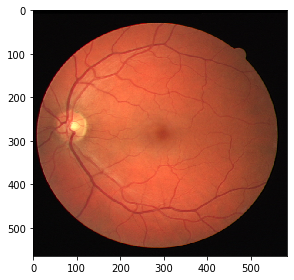

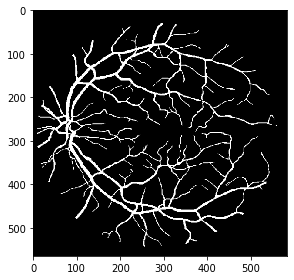

In [16]:
image_x = random.randint(0, len(train_ids))
imshow(X_train[image_x])
plt.show()
imshow(np.squeeze(Y_train[image_x]))
plt.show()

# The Model

In [17]:
norm_inputs = tf.keras.layers.Input((img_height, img_width,img_channels))
inputs = tf.keras.layers.Lambda(lambda x: x/255)(norm_inputs)

In [24]:
inputs

<KerasTensor: shape=(None, 565, 584, 3) dtype=float32 (created by layer 'lambda')>

## Contraction Path

In [18]:
c1 = tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', kernel_initializer='he_normal', padding = 'same' )(inputs)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', kernel_initializer='he_normal', padding = 'same' )(c1)
p1 = tf.keras.layers.MaxPool2D((2,2))(c1)

In [19]:
c2 = tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', kernel_initializer='he_normal', padding = 'same' )(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', kernel_initializer='he_normal', padding = 'same' )(c2)
p2 = tf.keras.layers.MaxPool2D((2,2))(c2)

In [20]:
c3 = tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', kernel_initializer='he_normal', padding = 'same' )(p2)
c3 = tf.keras.layers.Dropout(0.1)(c3)
c3 = tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', kernel_initializer='he_normal', padding = 'same' )(c3)
p3 = tf.keras.layers.MaxPool2D((2,2))(c3)

In [21]:
c4 = tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', kernel_initializer='he_normal', padding = 'same' )(p3)
c4 = tf.keras.layers.Dropout(0.1)(c4)
c4 = tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', kernel_initializer='he_normal', padding = 'same' )(c4)
p4 = tf.keras.layers.MaxPool2D((2,2))(c4)

In [22]:
c5 = tf.keras.layers.Conv2D(256, (3,3), activation = 'relu', kernel_initializer='he_normal', padding = 'same' )(p4)
c5 = tf.keras.layers.Dropout(0.1)(c5)
c5 = tf.keras.layers.Conv2D(256, (3,3), activation = 'relu', kernel_initializer='he_normal', padding = 'same' )(c5)
p5 = tf.keras.layers.MaxPool2D((2,2))(c5)

## Expansive Path

In [23]:
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

ValueError: A `Concatenate` layer requires inputs with matching shapes except for the concat axis. Got inputs shapes: [(None, 70, 72, 128), (None, 70, 73, 128)]

In [ ]:
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

In [ ]:
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

In [ ]:
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

In [ ]:
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='relu')(c9)

In [27]:
model = tf.keras.Model(inputs=[norm_inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 512, 512, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 512, 512, 16) 448         lambda[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 512, 512, 16) 0           conv2d[0][0]                     
______________________________________________________________________________________________

## Model Check Point

In [28]:
checkpointer = tf.keras.callbacks.ModelCheckpoint("u_net_model.h5", verbose=1, save_best_only=True)

In [29]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
    #tf.keras.callbacks.TensorBoard(log_dir = 'logs')
]

In [30]:
es = tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss')
tboard = tf.keras.callbacks.TensorBoard(log_dir = 'logs')

# Results

In [31]:
results = model.fit(X_train, Y_train, validation_split=0.2, batch_size=4, epochs=25, callbacks=callbacks)

Epoch 1/25
4/4 [==============================] - 10s 507ms/step - loss: 5696.8232 - accuracy: 0.2578 - val_loss: 4729.5205 - val_accuracy: 0.3548
Epoch 2/25
4/4 [==============================] - 2s 399ms/step - loss: 4893.5781 - accuracy: 0.3449 - val_loss: 4756.1826 - val_accuracy: 0.3885
Epoch 3/25
4/4 [==============================] - 2s 400ms/step - loss: 4917.6670 - accuracy: 0.3639 - val_loss: 4748.9497 - val_accuracy: 0.3200


In [52]:
#idx = random.randint(0, len(X_train))


preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)

 
preds_train_t = (preds_train > 0.99).astype(np.uint8)
preds_val_t = (preds_val > 0.99).astype(np.uint8)
preds_test_t = (preds_test > 0.99).astype(np.uint8)

1/1 [==============================] - 0s 29ms/step


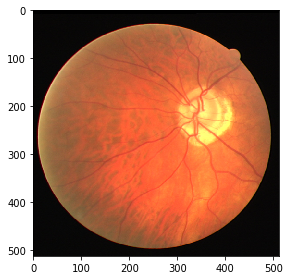

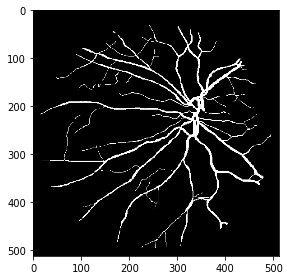

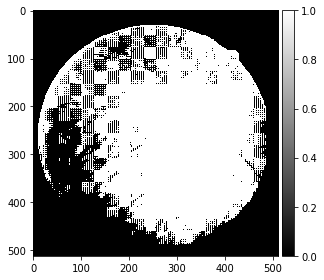

In [53]:
# Perform a sanity check on some random training samples
ix = random.randint(0, len(preds_train_t))
imshow(X_train[ix])
plt.show()
imshow(Y_train[ix])
plt.show()
imshow(np.squeeze(preds_train_t[ix]), cmap = "gray")
plt.show()

## Sanity check on some random validation samples

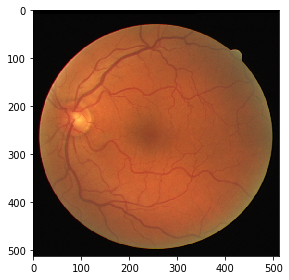

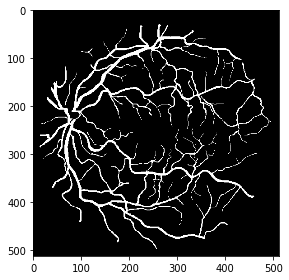

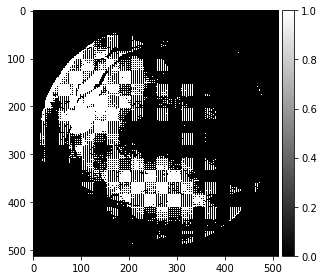

In [58]:
ix = random.randint(0, len(preds_val_t)-1)
imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))
plt.show()
imshow(np.squeeze(preds_val_t[ix]), cmap="gray")
plt.show()


## Sanity check on some random validation samples

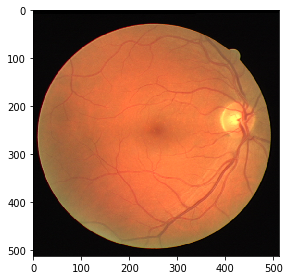

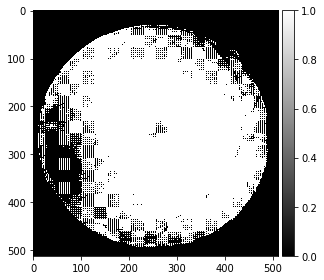

In [57]:
ix = random.randint(0, len(preds_test_t) - 1)
imshow(X_test[ix])
plt.show()
imshow(np.squeeze(preds_test_t[ix]), cmap="gray")
plt.show()